<a href="https://colab.research.google.com/github/OumaymaRedissi/Agence-bancaire-en-plsql/blob/main/notebooks/Exploratory_Data_Analysis_(videos).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Squats classification EDA

## Importing neccessary libraries

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

## 0.Data loading

In [ ]:
folder_path = "D:\PFE2023\data\Video_Dataset"
folders = os.listdir(folder_path)
print(folders)

['bad_back_round', 'bad_back_warp', 'bad_head', 'bad_inner_thigh', 'bad_shallow', 'bad_toe', 'good']


## 1.Data inspection

### Number of videos for each type

In [ ]:
video_counts = []
for folder_name in folders:
    folder = os.path.join(folder_path, folder_name)
    video_count = len([file for file in os.listdir(folder) if file.endswith(".mp4")])
    video_counts.append(video_count)

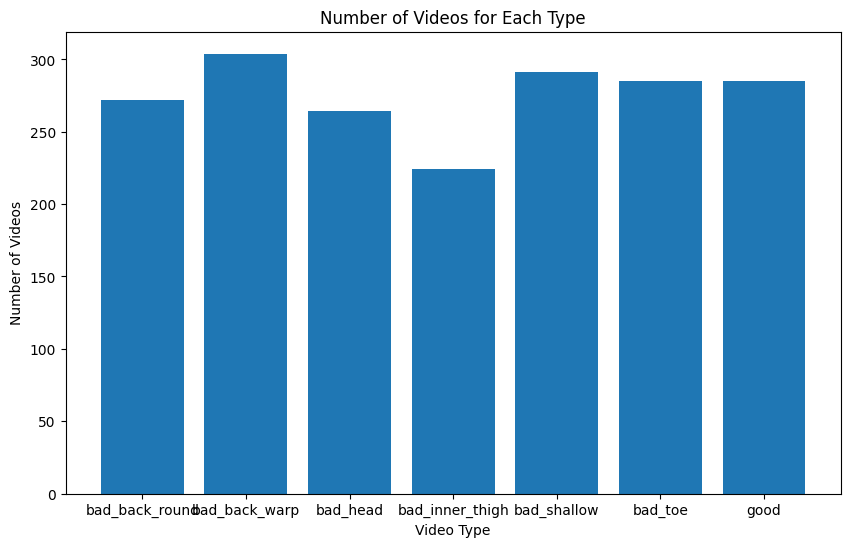

Total number of videos: 1925


In [ ]:
# Create a bar chart to visualize the video counts
fig, ax = plt.subplots(figsize=(10, 6)) # set the figsize parameter to make the figure wider
plt.bar(folders, video_counts)
plt.title("Number of Videos for Each Type")
plt.xlabel("Video Type")
plt.ylabel("Number of Videos")
plt.show()

print("Total number of videos:",sum(video_counts))

### Distribution of video lengths (frames)

In [ ]:
video_lengths = {}
for folder_name in folders:
    folder = os.path.join(folder_path, folder_name)
    video_lengths[folder_name] = []
    for video_file in os.listdir(folder):
        if video_file.endswith(".mp4"):
            video_path = os.path.join(folder, video_file)
            try:
                cap = cv2.VideoCapture(video_path)
                length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
                video_lengths[folder_name].append(length)
                #print(f"Video {video_file} in folder {folder_name} has {length} frames")
                cap.release()
            except:
                print(f"Could not read video file: {video_path}")


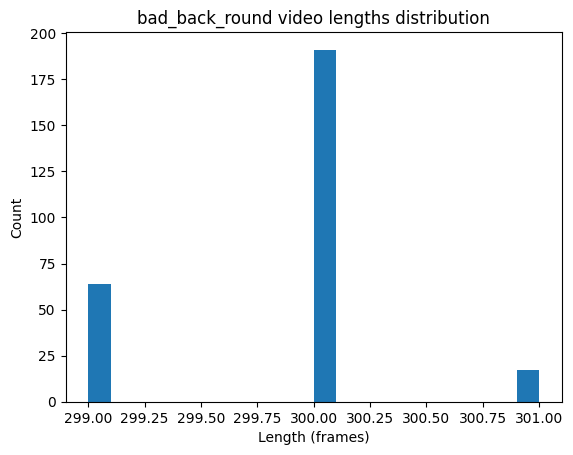

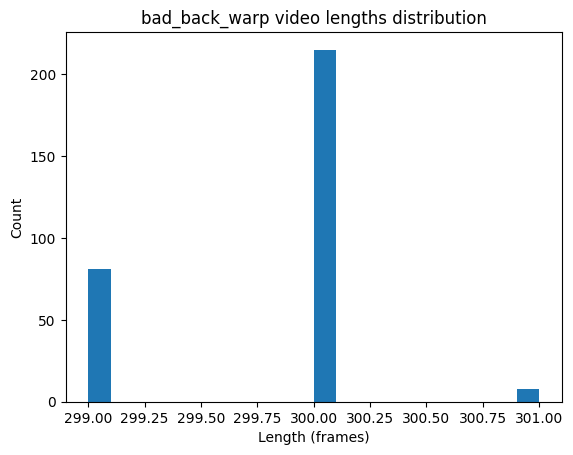

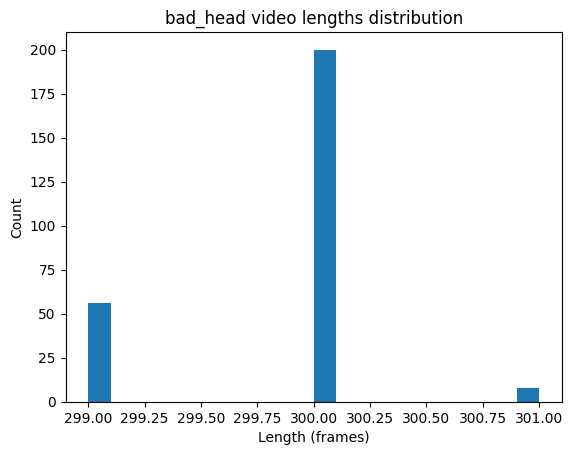

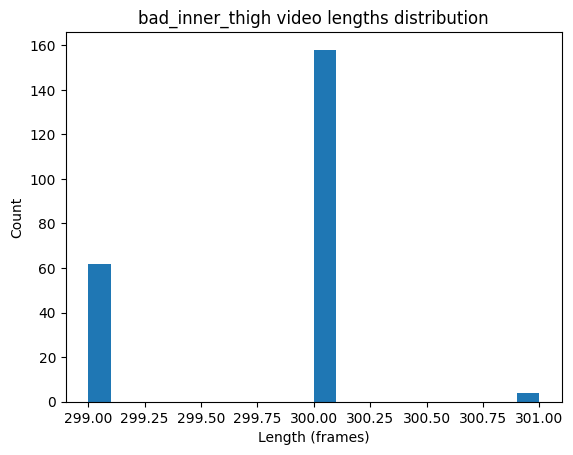

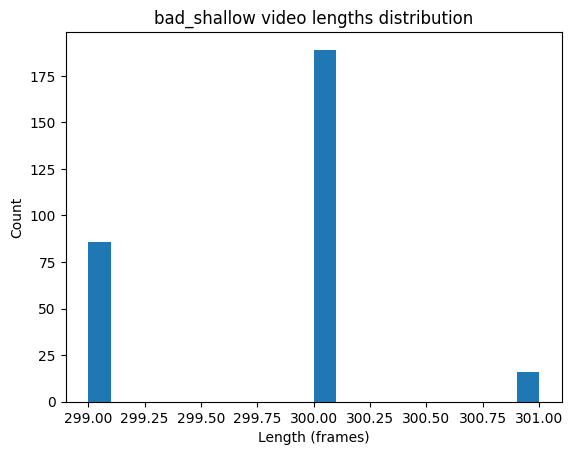

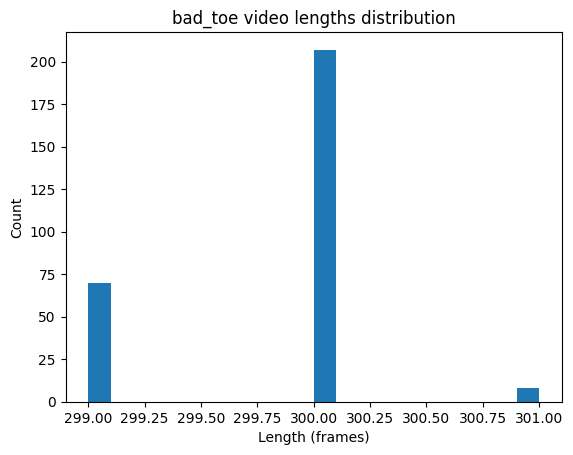

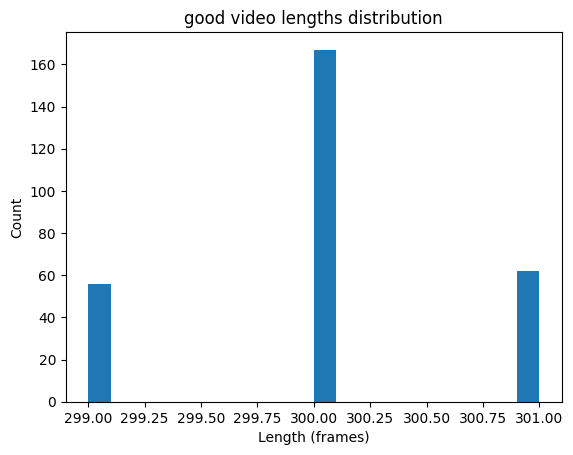

In [ ]:
for folder, lengths in video_lengths.items():
    plt.hist(lengths, bins=20)
    plt.title(f"{folder} video lengths distribution")
    plt.xlabel("Length (frames)")
    plt.ylabel("Count")
    plt.show()

In [ ]:
lengths = []
for folder_name in video_lengths.keys():
    lengths += video_lengths[folder_name]

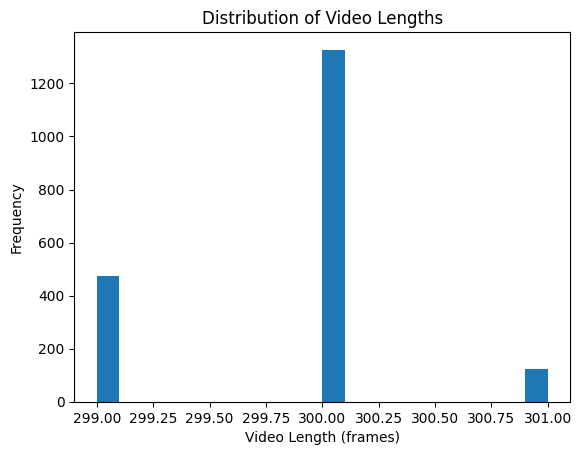

In [ ]:
# plot a histogram of the video lengths
plt.hist(lengths, bins=20)
plt.xlabel("Video Length (frames)")
plt.ylabel("Frequency")
plt.title("Distribution of Video Lengths")
plt.show()

### Distribution of videos resolution

In [ ]:
resolutions = []

# loop over each video in folder
for folder_name in folders:
    folder = os.path.join(folder_path, folder_name)
    for video_file in os.listdir(folder):
        video_path = os.path.join(folder, video_file)
        cap = cv2.VideoCapture(video_path)
        width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
        height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
        resolutions.append((width, height))
        cap.release()
# extract width and height into separate lists
widths, heights = zip(*resolutions)

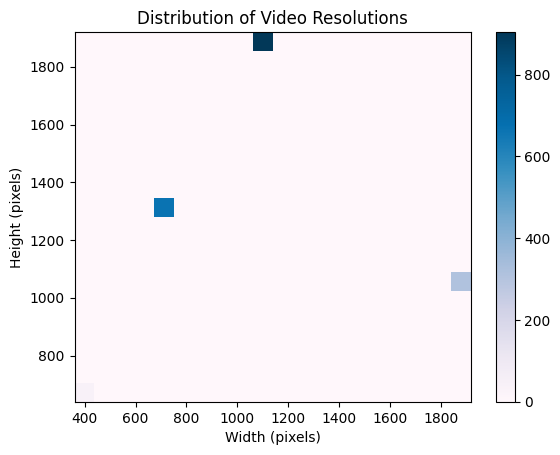

In [ ]:
# plot a histogram of the video resolutions
plt.hist2d(widths, heights, bins=(20, 20), cmap=plt.cm.PuBu)
plt.colorbar()
plt.xlabel("Width (pixels)")
plt.ylabel("Height (pixels)")
plt.title("Distribution of Video Resolutions")
plt.show()